In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

In [3]:
# データのロード (ここではIrisデータセットを使用)
iris = load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
# モデルのインスタンス化
clf = RandomForestClassifier(random_state=42)

# クロスバリデーションを使用して予測を行う
y_pred = cross_val_predict(clf, X, y, cv=5)

In [6]:
len(y_pred)

150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
accuracy: 0.9666666666666667
f1: 0.9666633329999667


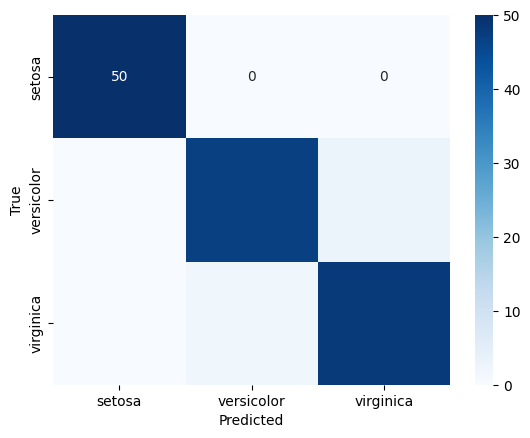

In [8]:
# 混同行列の生成
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro', zero_division=0)
print(f'accuracy: {accuracy}')
print(f'f1: {f1}')
# 混同行列の可視化
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [7]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# 真のラベルと予測ラベルの例（0, 1, 2をクラスラベルとしています）
y_true = [(0, 1), (0, 2), (1, 2), (0, 1, 2), (2,)]
y_pred = [(0, 1), (0, 1), (1, 2), (0, 1), (2, 1)]

# MultiLabelBinarizerを使用してラベルをバイナリ形式に変換
mlb = MultiLabelBinarizer()
y_true_binary = mlb.fit_transform(y_true)
y_pred_binary = mlb.transform(y_pred)

In [15]:
print(f'真ラベル \n{y_true_binary}')
print(f'予測ラベル \n{y_pred_binary}')

真ラベル 
[[1 1 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]
 [0 0 1]]
予測ラベル 
[[1 1 0]
 [1 1 0]
 [0 1 1]
 [1 1 0]
 [0 1 1]]


In [9]:
# 混同行列の計算
conf_mat = multilabel_confusion_matrix(y_true_binary, y_pred_binary)
print(conf_mat)

# 混同行列の表示
for i, (label, matrix) in enumerate(zip(mlb.classes_, conf_mat)):
    print(f"Class {label}:")
    print(matrix)

[[[2 0]
  [0 3]]

 [[0 2]
  [0 3]]

 [[1 0]
  [2 2]]]
Class 0:
[[2 0]
 [0 3]]
Class 1:
[[0 2]
 [0 3]]
Class 2:
[[1 0]
 [2 2]]
